# DA 620 - CAPSTONE 
Heart Rate failure Analysis
Anusiya Sekar

# Data Exploration

In [4]:
#Installing required libararies
!pip install plotly
!pip install plotly_express

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import warnings 
warnings.filterwarnings('ignore')


Data Exploration


In [7]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [87]:
rows, columns = df.shape

print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 299
Number of Columns: 13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [91]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [92]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Check for null values in each column
null_counts = df.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

# Alternatively, check if any null values exist in the entire DataFrame
if df.isnull().values.any():
    print("There are null values in the DataFrame.")
else:
    print("No null values in the DataFrame.")

Columns with null values:
Series([], dtype: int64)
No null values in the DataFrame.


In [116]:
#This is how the data changes if we remove outliers
rom scipy.stats import zscore
df_no_outliers = df[(np.abs(zscore(df)) < 3).all(axis=1)]
df_no_outliers.shape

(280, 13)

# Data Visualization and Manipulation


Correlation analysis

In [118]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [117]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

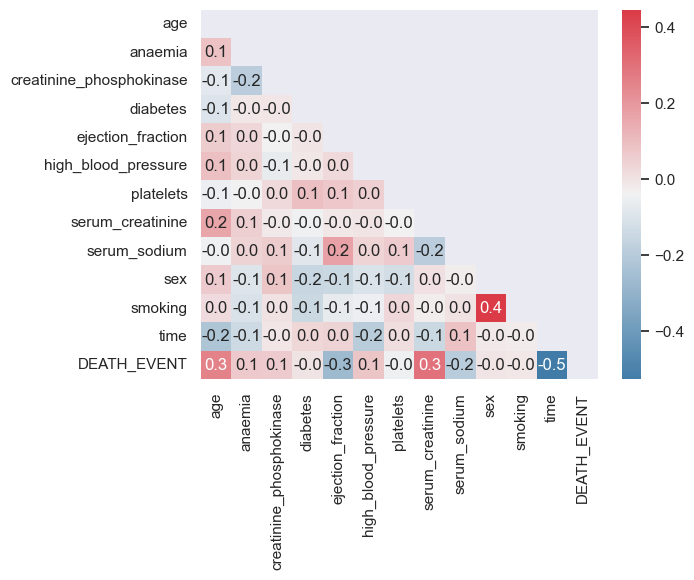

In [156]:
sns.set(style="dark")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".1f", square=False,)

# Show the plot
plt.show()

Based on the above result We will consider DEATH_EVENT as our target feature.

Let's see more plots and understand the data better

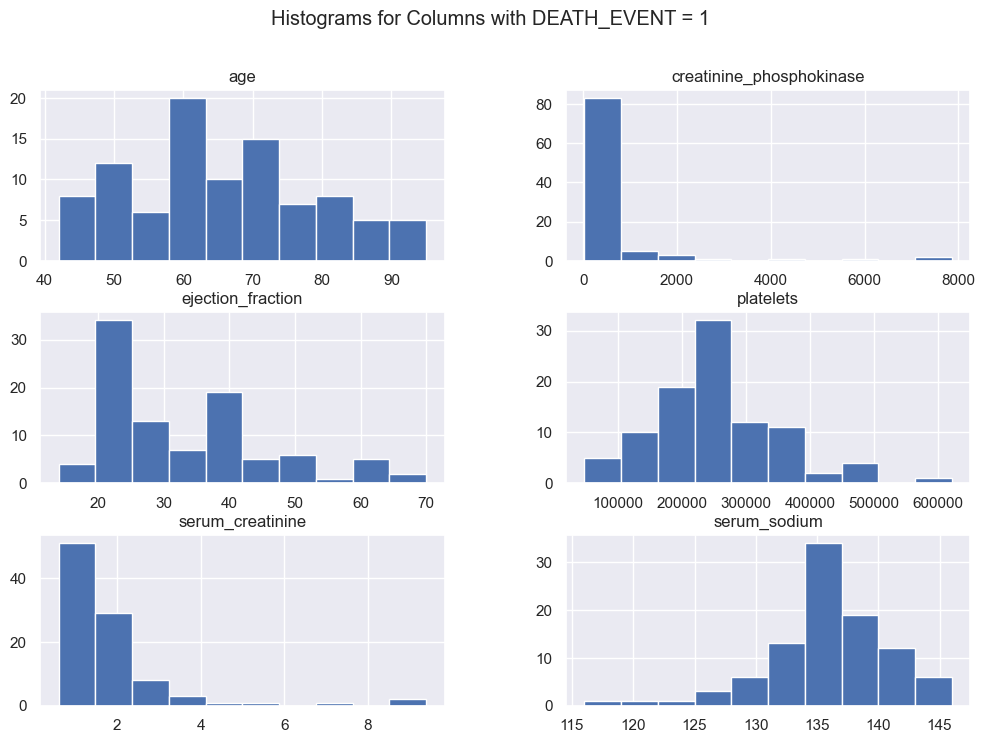

In [159]:
#Basic historgram to see data distribution vs count
columns_to_plot = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Filter the DataFrame based on the condition DEATH_EVENT = 1
filtered_df = df[df['DEATH_EVENT'] == 1]

# Plot histograms for the specified columns
filtered_df[columns_to_plot].hist(figsize=(12, 8))
plt.suptitle('Histograms for Columns with DEATH_EVENT = 1')
plt.show()

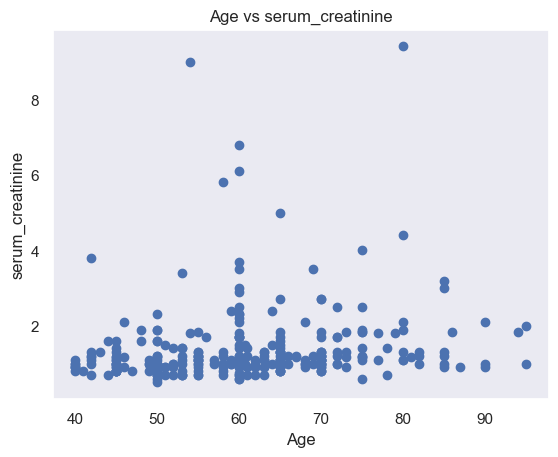

In [129]:
plt.plot(df['age'], df['serum_creatinine'], marker='o', linestyle= ' ')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('serum_creatinine')
plt.title('Age vs serum_creatinine')

# Display the plot
plt.show()

In [161]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='sex' , hover_data=df.columns , barmode='group')
fig.update_layout(title_text='Histogram of DEATH_EVENT with Sex Grouping')
fig.show()


In [163]:
fig = px.pie(df, names='sex', title='Sex Ratio in Data')
fig.show()

In [174]:
# Filter the DataFrame based on the condition DEATH_EVENT = 1
filtered_df = df[df['DEATH_EVENT'] == 1]

# Create a pie chart for the sex ratio in the filtered DataFrame
fig = px.pie(filtered_df, names='sex', title='Sex Ratio in Data (DEATH_EVENT = 1)')
fig.show()

In [164]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='anaemia' , hover_data=df.columns , barmode='group')
fig.update_layout(title_text='Histogram of DEATH_EVENT with anaemia grouping')

fig.show()

In [166]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='diabetes' , hover_data=df.columns , barmode='group')
fig.update_layout(title_text='Histogram of DEATH_EVENT with Diabetes grouping')
fig.show()

In [167]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='high_blood_pressure' , hover_data=df.columns , barmode='group')
fig.update_layout(title_text='Histogram of DEATH_EVENT with high_blood_pressure grouping')
fig.show()


In [168]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='smoking' , hover_data=df.columns , barmode='group')
fig.update_layout(title_text='Histogram of DEATH_EVENT with Smoking grouping')

fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

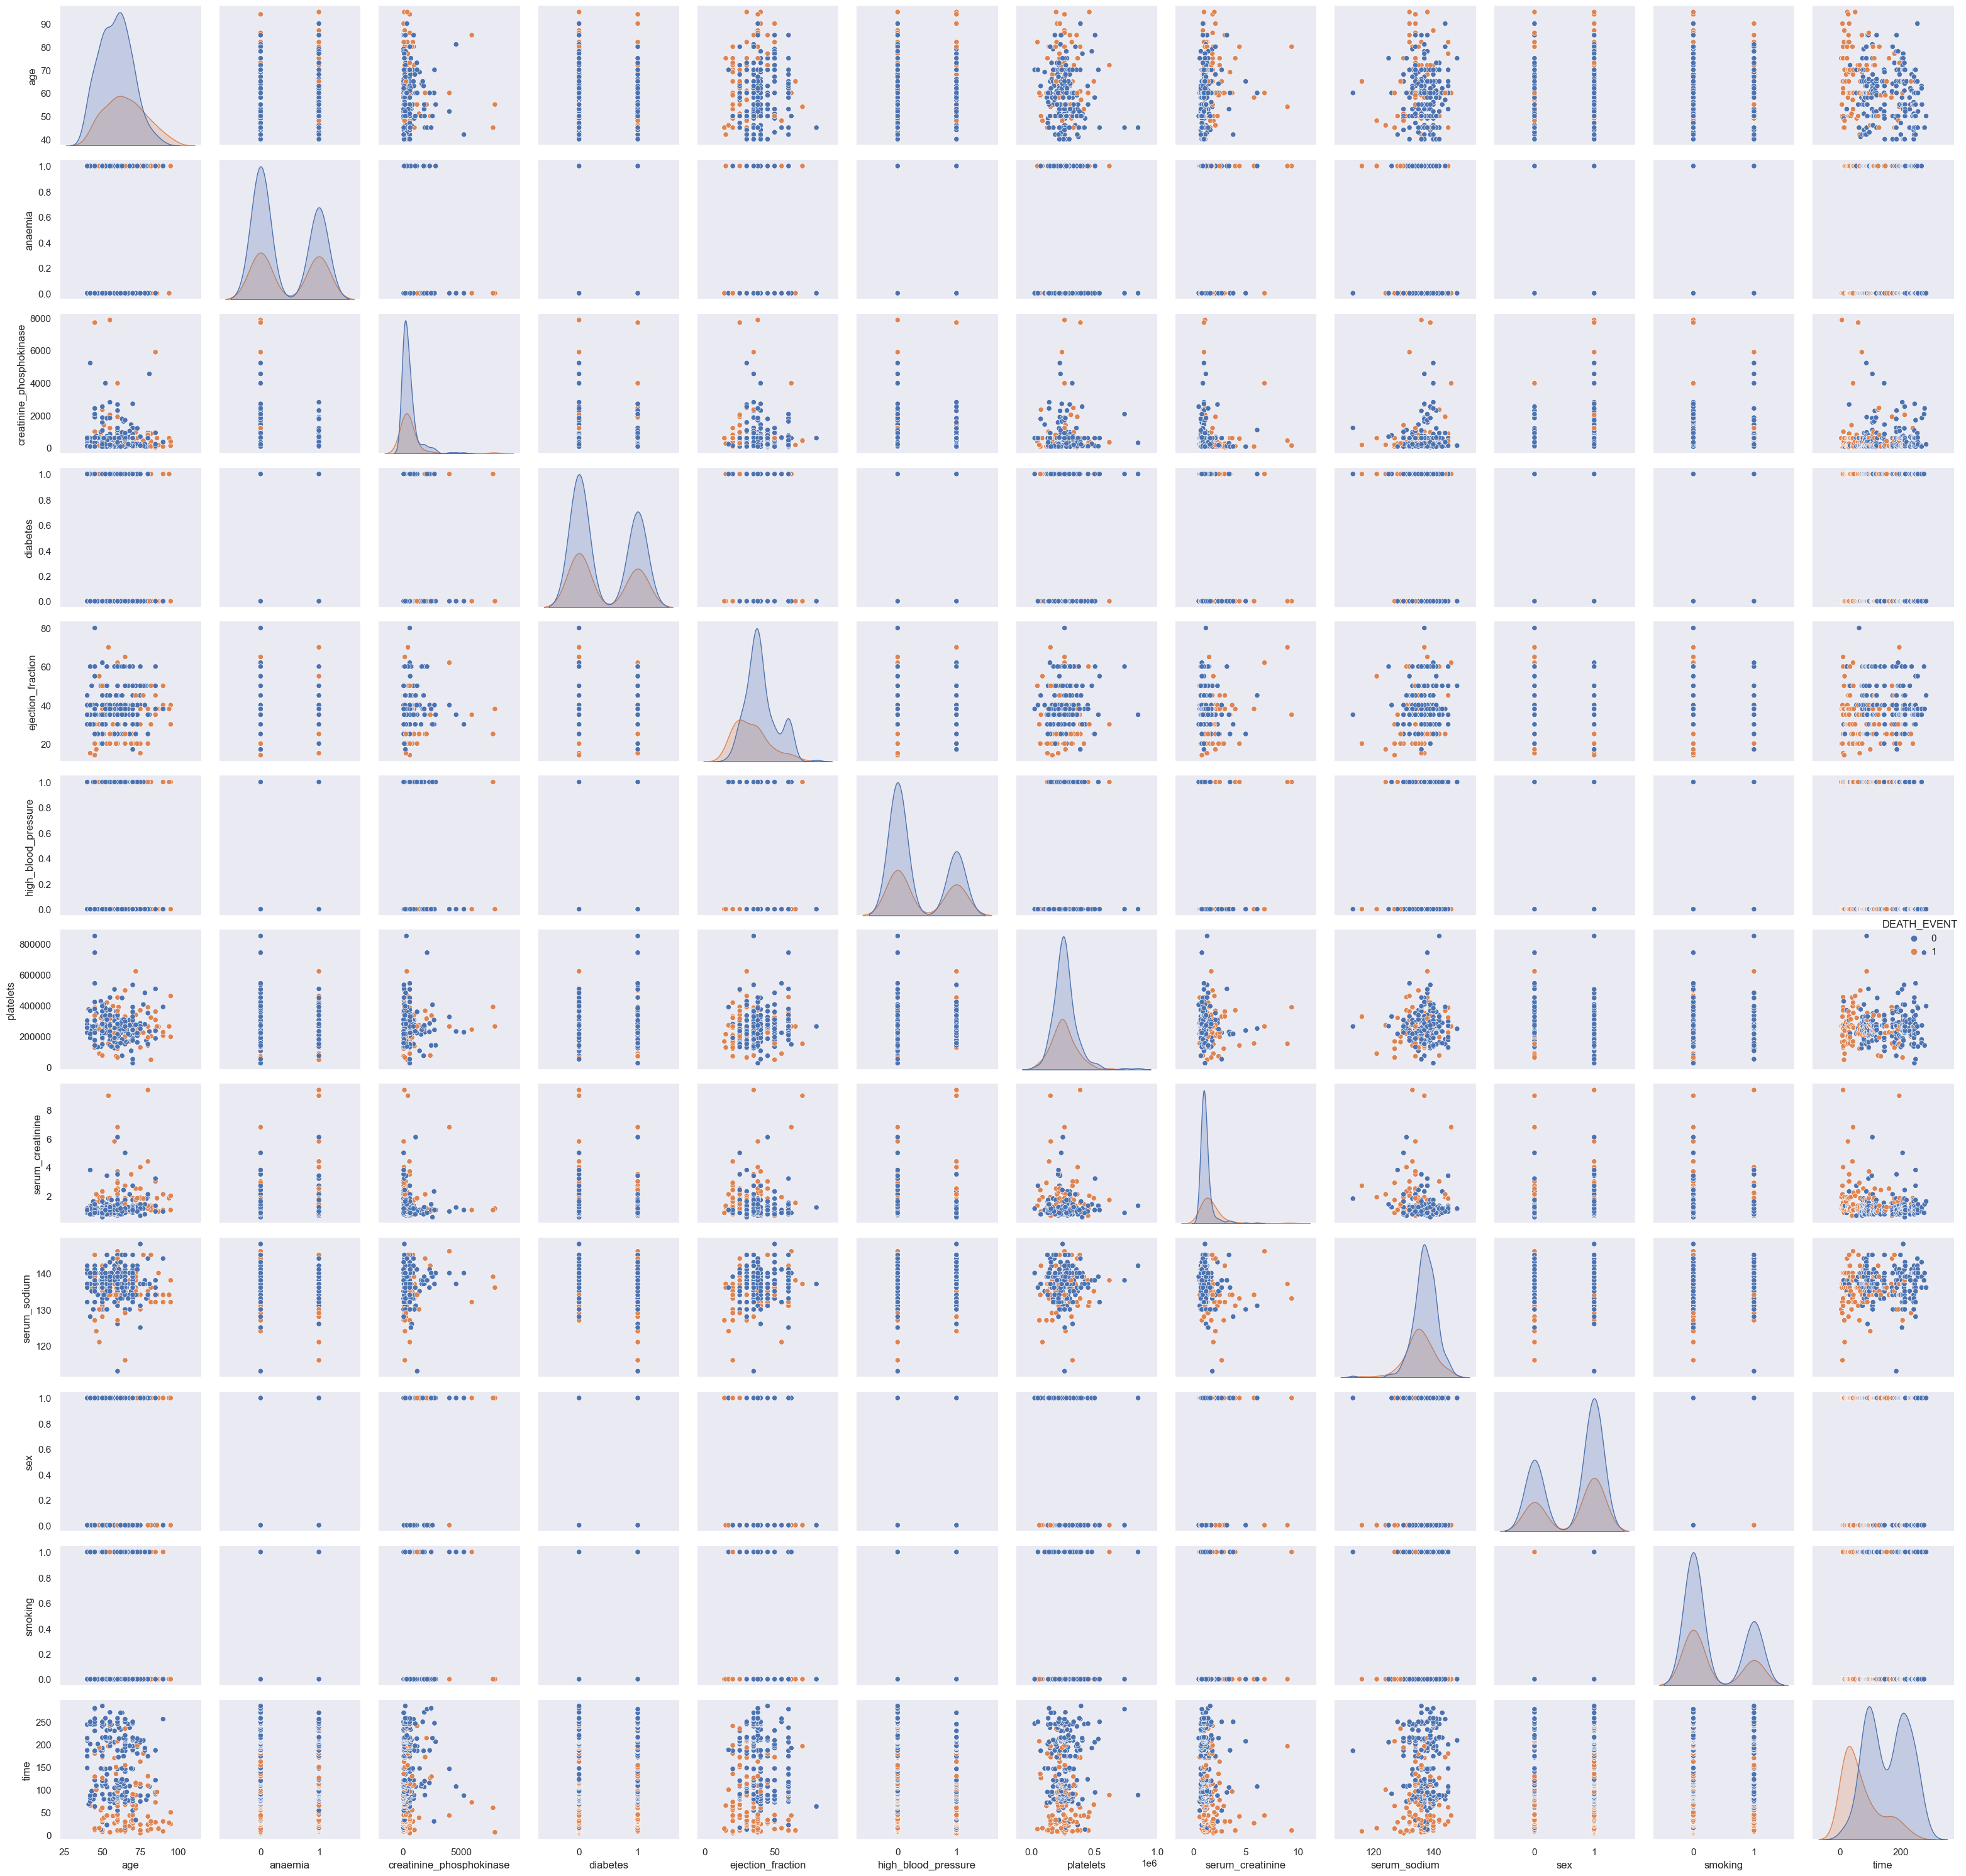

In [126]:
plt.figure(figsize=(15,10))
sns.pairplot(df , hue = 'DEATH_EVENT')
plt.tight_layout()
plt.plot()

In [170]:
fig = px.box(df , y = 'age' , x = 'DEATH_EVENT' , title='Age distribution by death event')
fig.show()

In [171]:
fig = px.box(df , y = 'serum_creatinine' , x = 'DEATH_EVENT' , title='Creatinine Serum by death event')
fig.show()

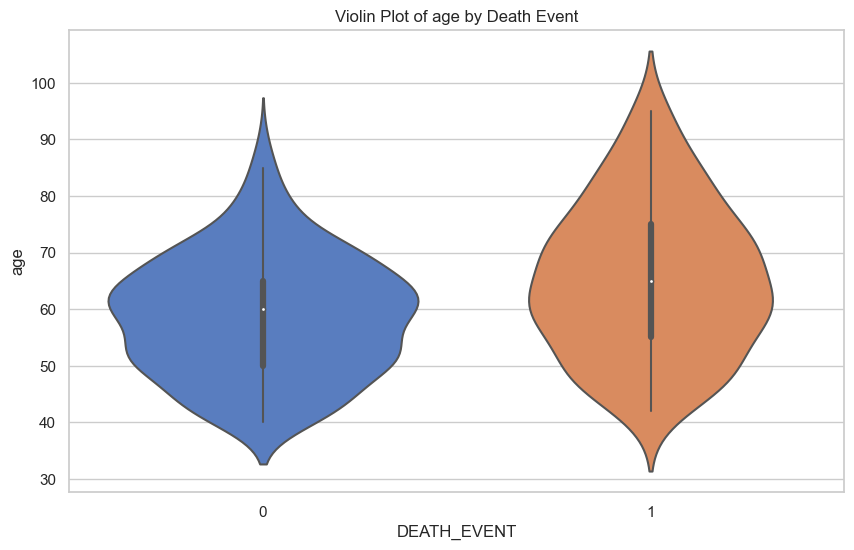

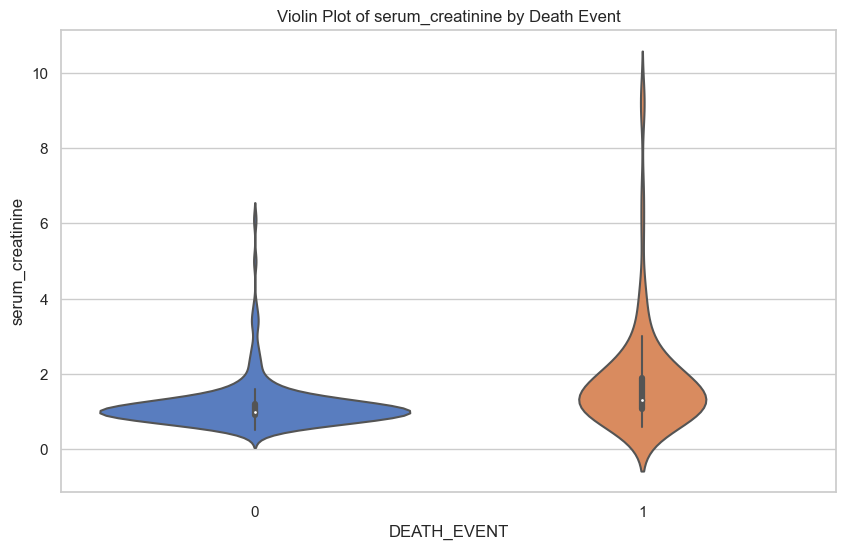

In [130]:
sns.set(style="whitegrid")

# List of numerical features you want to visualize
numerical_features = ['age',  'serum_creatinine']

# Create violin plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='DEATH_EVENT', y=feature, data=df, palette="muted")
    plt.title(f"Violin Plot of {feature} by Death Event")
    plt.show()

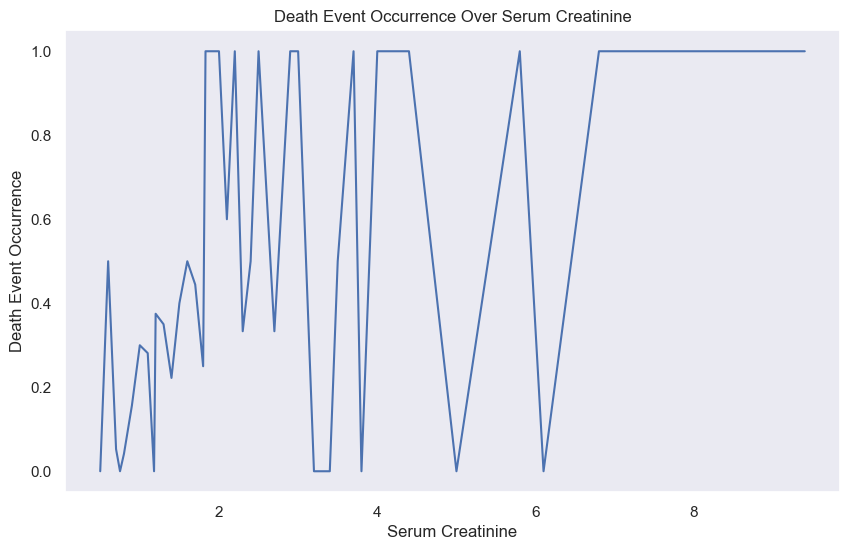

In [173]:
df_sorted = df.sort_values(by='time')

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='serum_creatinine', y='DEATH_EVENT', data=df_sorted, ci=None)

# Adding labels and title
plt.xlabel('Serum Creatinine')
plt.ylabel('Death Event Occurrence')
plt.title('Death Event Occurrence Over Serum Creatinine')

# Show the plot
plt.show()

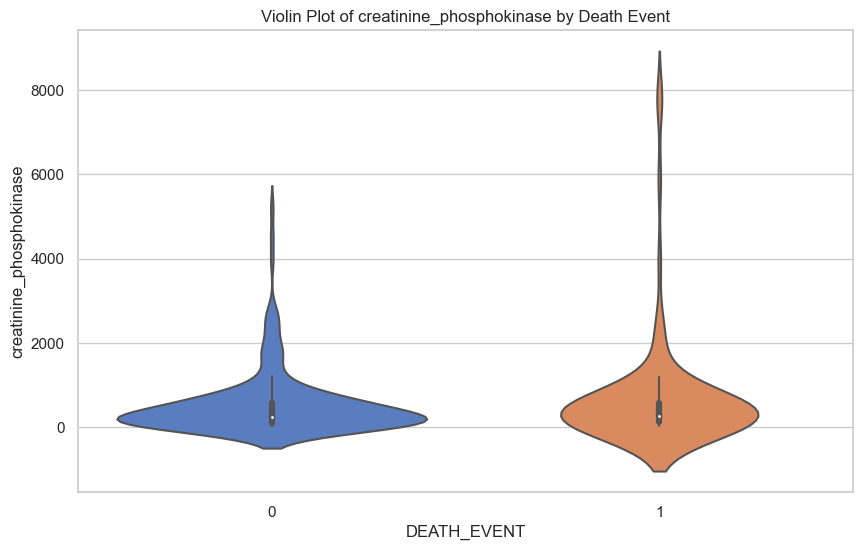

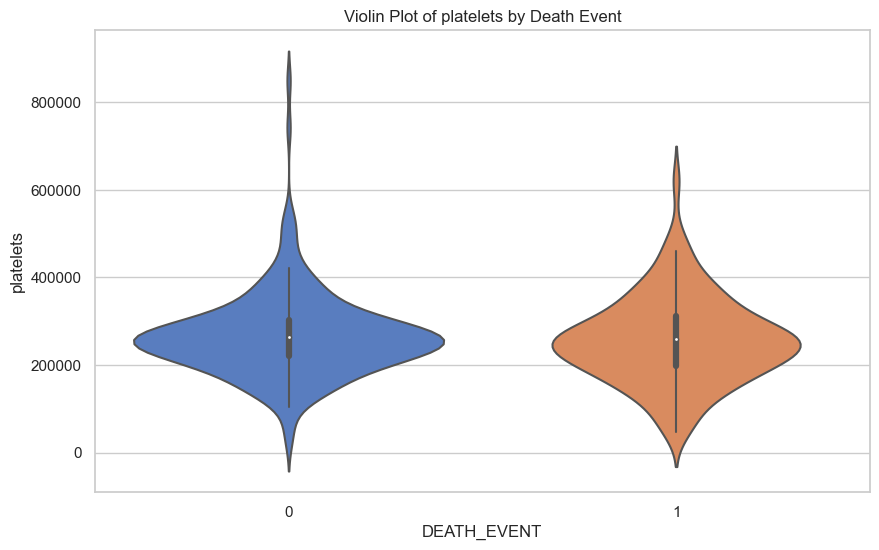

In [132]:
sns.set(style="whitegrid")

# List of numerical features you want to visualize
numerical_features = ['creatinine_phosphokinase', 'platelets']

# Create violin plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='DEATH_EVENT', y=feature, data=df, palette="muted")
    plt.title(f"Violin Plot of {feature} by Death Event")
    plt.show()

In [113]:
df['age_squared'] = df['age'] ** 2
df = df.drop(columns=['age_squared'])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [179]:
df_age = pd.DataFrame(df.groupby('DEATH_EVENT')['age'].mean())
print(df_age)

                   age
DEATH_EVENT           
0            58.761906
1            65.215281


In [109]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

DEATH_EVENT
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

In [175]:
df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()

DEATH_EVENT
0    540.054187
1    670.197917
Name: creatinine_phosphokinase, dtype: float64

In [176]:
df.groupby('DEATH_EVENT')['ejection_fraction'].mean()

DEATH_EVENT
0    40.26601
1    33.46875
Name: ejection_fraction, dtype: float64

# Preprocessing
Define features and target


In [16]:
#assigning our label to y
X = df.drop('DEATH_EVENT' , axis='columns')
y = df['DEATH_EVENT']

In [17]:
#Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [191]:
#Splitting the training and testing dataset
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.1 , random_state= 42 , shuffle= True)

In [180]:
rows, columns = X_train.shape
print("Trainig data set has \n")
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Trainig data set has 

Number of Rows: 239
Number of Columns: 12


In [181]:
rows, columns = X_test.shape
print("Testing data set has \n")
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Testing data set has 

Number of Rows: 60
Number of Columns: 12


In [137]:
y_train.shape

(239,)

In [138]:
y_test.shape

(60,)

# Classification Models 
We know that our result is a boolean velue and hence we have to run classifications and not regression. 


1. Logistic Regression Model

In [192]:
lr_model = LogisticRegression(penalty='l2' , C= 15 ,max_iter=1000)
lr_model.fit(X_train , y_train)

LogisticRegression(C=15, max_iter=1000)

In [193]:
log_train_acc = lr_model.score(X_train , y_train)
log_train_acc

0.8410041841004184

In [194]:
lr_pred = lr_model.predict(X_test)

In [195]:
log_test_acc = accuracy_score(y_test , lr_pred)
log_test_acc

0.8

In [198]:
print("Logistic regression Model results:\n")
print("Trainig Dataset accuracy:",round(log_train_acc,2) )
print("Testing Dataset accuracy:",round(log_test_acc,2) )


Logistic regression Model results:

Trainig Dataset accuracy: 0.84
Testing Dataset accuracy: 0.8


2. Decision Tree Model

In [199]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [201]:
dec_train_acc = DT_model.score(X_train , y_train)
dec_train_acc

1.0

In [202]:
DT_pred = DT_model.predict(X_test)

In [203]:
dec_test_acc = accuracy_score(y_test , DT_pred)
dec_test_acc

0.65

In [205]:
print("Decision Tree regression Model results:\n")
print("Trainig Dataset accuracy:",round(dec_train_acc,2) )
print("Testing Dataset accuracy:",round(dec_test_acc,2) )


Decision Tree regression Model results:

Trainig Dataset accuracy: 1.0
Testing Dataset accuracy: 0.65


Overfitting happened in this model

3. Random Forest Model

In [208]:
RF_model = RandomForestClassifier(n_estimators=1000)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=1000)

In [209]:
ran_train_acc = RF_model.score(X_train , y_train)
ran_train_acc

1.0

In [210]:
RF_pred = RF_model.predict(X_test)

In [211]:
ran_test_acc = accuracy_score(y_test , RF_pred)
ran_test_acc

0.7166666666666667

In [212]:
print("Random Forest regression Model results:\n")
print("Trainig Dataset accuracy:",round(ran_train_acc,2) )
print("Testing Dataset accuracy:",round(ran_test_acc,2) )

Random Forest regression Model results:

Trainig Dataset accuracy: 1.0
Testing Dataset accuracy: 0.72


4. Support Vector Classifier (SVC)

In [213]:
svc = SVC(gamma='auto' , C=6)
svc.fit(X_train , y_train)

SVC(C=6, gamma='auto')

In [214]:
svc_train = svc.score(X_train , y_train)
svc_train

1.0

In [215]:
svc_test = svc.score(X_test , y_test)
svc_test

0.5833333333333334

In [216]:
print("Support Vector Classifier (SVC) results:\n")
print("Trainig Dataset accuracy:",round(svc_train,2) )
print("Testing Dataset accuracy:",round(svc_test,2) )

Support Vector Classifier (SVC) results:

Trainig Dataset accuracy: 1.0
Testing Dataset accuracy: 0.58


Conclusion
The models are going to overfitting but the best one is Logistic regression model with accuracy 80% which is less in overfitting and to make it has higher accuracy we can get more data as this data seems small.

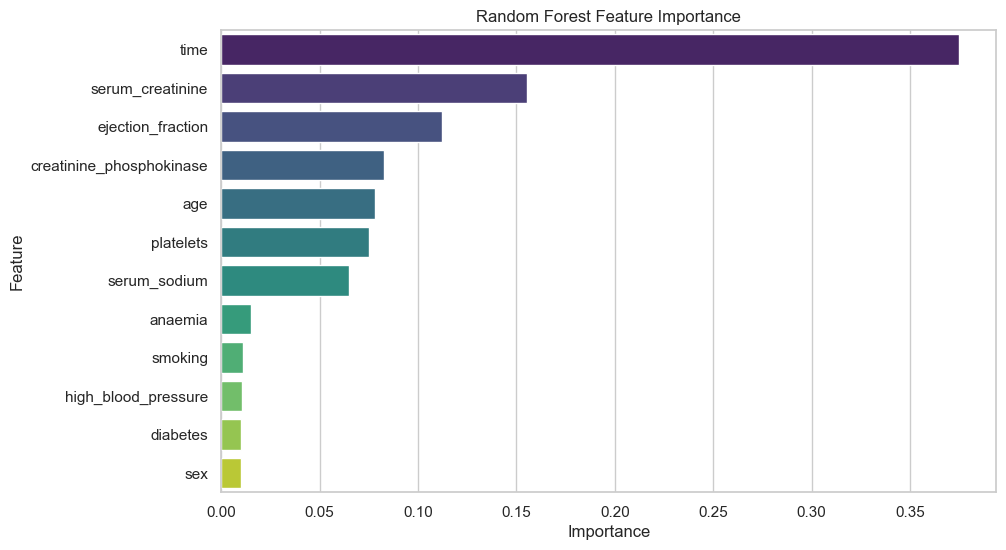

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame with features and target variable
# Replace 'target_column' with the actual name of your target variable column
X = df.drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()


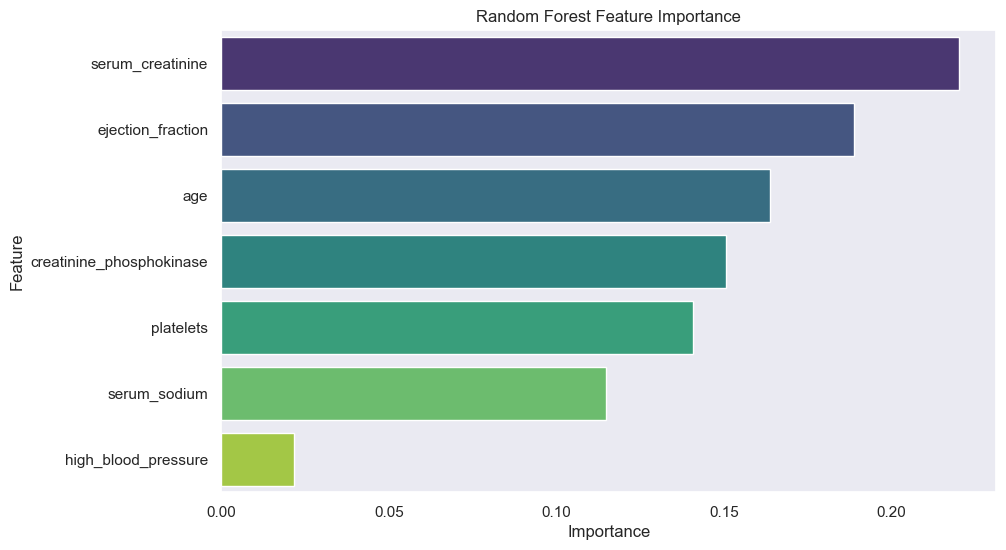

In [217]:
# Assuming df is your DataFrame with features and target variable
# Replace 'target_column' with the actual name of your target variable column
df_dropped_time_diabetes = df.drop(['time', 'diabetes','smoking','anaemia','sex'], axis=1)

# Assuming df is your DataFrame with features and target variable
# Replace 'target_column' with the actual name of your target variable column
X = df_dropped_time_diabetes.drop('DEATH_EVENT', axis=1)  # Features
y = df_dropped_time_diabetes['DEATH_EVENT']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()


Best k value based on testing accuracy: 8


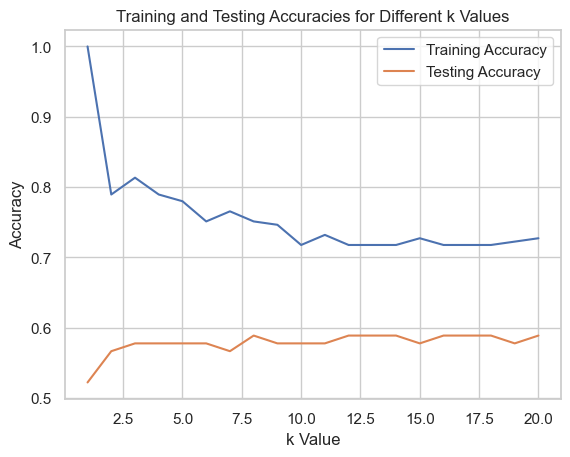


Confusion Matrix for Training set (k=8):
 [[148   2]
 [ 50   9]]
Training Accuracy for k=8: 0.7511961722488039

Confusion Matrix for Testing set (k=8):
 [[52  1]
 [36  1]]
Testing Accuracy for k=8: 0.5888888888888889


In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of k values to try
k_values = range(1, 21)  # You can adjust the range based on your preference

# Initialize lists to store results
training_accuracies = []
testing_accuracies = []

for k in k_values:
    # Initialize the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = knn.predict(X_train)
    
    # Make predictions on the testing data
    y_test_pred = knn.predict(X_test)
    
    # Evaluate the model on training data and append accuracy to the list
    training_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(training_accuracy)
    
    # Evaluate the model on testing data and append accuracy to the list
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(testing_accuracy)

# Find the best k value based on testing accuracy
best_k = k_values[testing_accuracies.index(max(testing_accuracies))]

# Print the best k value
print(f"Best k value based on testing accuracy: {best_k}")

# Plot the accuracies for different k values
plt.plot(k_values, training_accuracies, label='Training Accuracy')
plt.plot(k_values, testing_accuracies, label='Testing Accuracy')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracies for Different k Values')
plt.show()

# Initialize the KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the training data
best_knn.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_best_k = best_knn.predict(X_train)

# Make predictions on the testing data
y_test_pred_best_k = best_knn.predict(X_test)

# Print confusion matrix and accuracy for training set
print(f"\nConfusion Matrix for Training set (k={best_k}):\n", confusion_matrix(y_train, y_train_pred_best_k))
print(f"Training Accuracy for k={best_k}: {accuracy_score(y_train, y_train_pred_best_k)}")

# Print confusion matrix and accuracy for testing set
print(f"\nConfusion Matrix for Testing set (k={best_k}):\n", confusion_matrix(y_test, y_test_pred_best_k))
print(f"Testing Accuracy for k={best_k}: {accuracy_score(y_test, y_test_pred_best_k)}")

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X is your feature matrix and y is your target variable
# X and y should be defined based on your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = nb_classifier.predict(X_train)

print("Gaussian Naive Bayes Classifier Result \n")

# Print confusion matrix and accuracy for training data
print("Training Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))

# Make predictions on the testing data
y_test_pred = nb_classifier.predict(X_test)
# Print confusion matrix and accuracy for testing data
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Testing Set Accuracy:", accuracy_score(y_test, y_test_pred))


Gaussian Naive Bayes Classifier Result 

Training Set Confusion Matrix:
[[156  12]
 [ 29  42]]
Training Set Accuracy: 0.8284518828451883

Testing Set Confusion Matrix:
[[34  1]
 [15 10]]
Testing Set Accuracy: 0.7333333333333333


Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.68      0.68        60

Confusion Matrix:
 [[28  7]
 [12 13]]


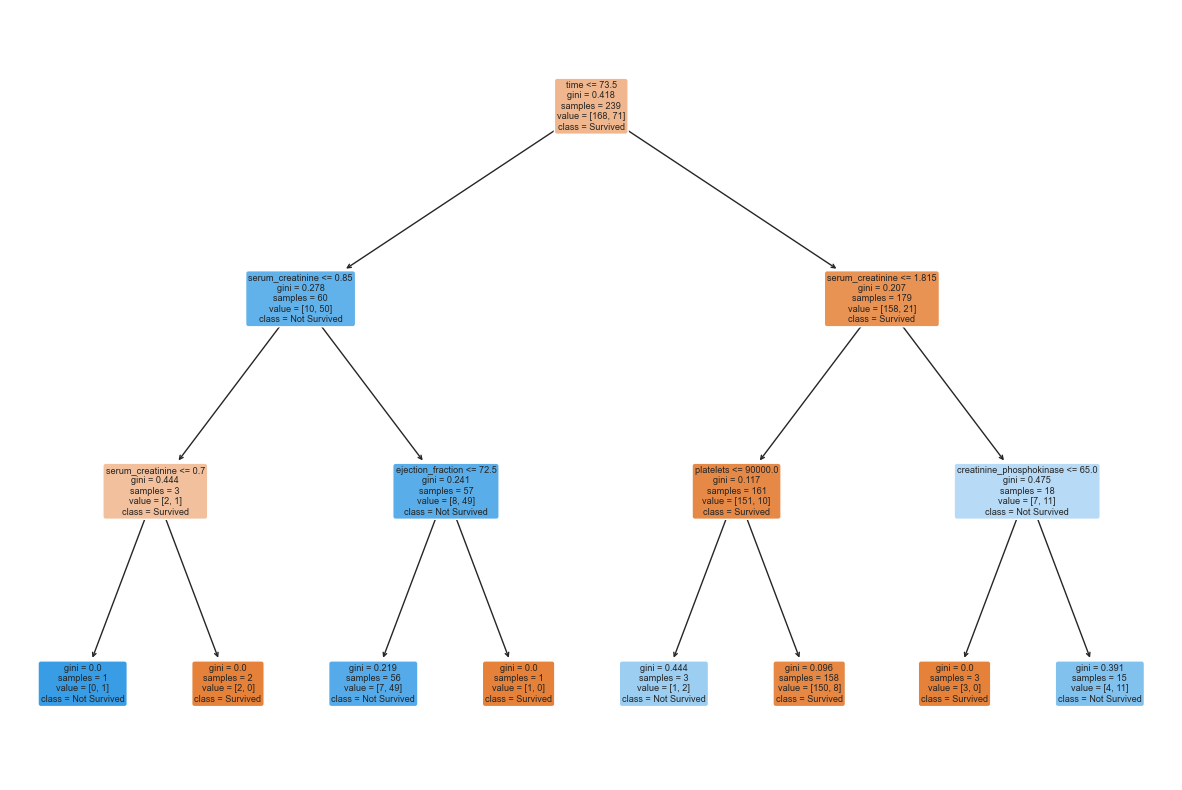

In [218]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your DataFrame is named df
# Drop the label column to get features
X = df.drop("DEATH_EVENT", axis=1)

# Get the label column
y = df["DEATH_EVENT"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree with max_depth=3
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=["Survived", "Not Survived"], filled=True, rounded=True, max_depth=3)
plt.show()
